In [ ]:
# conda install pytorch torchvision torchaudio cpuonly -c pytorch
# !pip install laserembeddings
# python -m laserembeddings download-models /to/your/directory/
# !pip install "tensorflow>=2.0.0"
# !pip install --upgrade tensorflow-hub
# !pip install googletrans==3.1.0a0

# *Anaconda Installation is a must

In [1]:
#C#1

#Import necessary libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator
from IPython.display import display
#import tensorflow_hub as hub
from laserembeddings import Laser
from scipy.spatial import distance  
from sklearn.metrics.pairwise import cosine_similarity

#Call and write: classes, objects, and functions

#Googletrans
translator = Translator()

#Percentage Function
def percentage(part, whole):
    
    percentage = 100 * float(part)/float(whole)

    return str(percentage) + "%"

#Laserembeddings
path_to_bpe_codes = "93langs.fcodes"
path_to_bpe_vocab = "93langs.fvocab"
path_to_encoder = "bilstm.93langs.2018-12-26.pt"

laser = Laser(path_to_bpe_codes, path_to_bpe_vocab, path_to_encoder)

#Tensorflow
#embed = hub.load('4')


In [2]:
#Testing

embeddings = laser.embed_sentences(
    ["Why this much delay",
     'What are the most common reasons for delivery delays'],
    lang=['en', 'en'])

In [3]:
#Testing

print(1 - distance.cosine(embeddings[0], embeddings[1]))
# print(cosine_similarity(embeddings[0].reshape(1,-1), embeddings[1].reshape(1,-1)))

0.6492337584495544


<!-- C#2 -->

# Deep Dive Analysis
### Focus Area 1 Objectives: 

1) Classify the number of customers whose answers were replied or not replied
2) See the language (EN/BN/BNE) via which the customers made the query

### Classifying the number of customers whose queries were replied:

#### Load data and Determine the language of the queries.

In [15]:
df = pd.read_csv(r"C:\Users\Daraz\Documents\ddda\ChatDetailsDataset\2022_09140914_CD.csv")

In [16]:
df.columns

Index(['Create Date', 'tenant_name', 'robot_code', 'robot_name', 'from_id',
       'from_name', 'Session_id', 'Intention', 'user_id',
       'Seller id (X-space)', 'user_nick', 'create_time', 'chat_uuid',
       'Enter Type', 'query', 'Question Type', 'sopname', 'answer_type',
       'SOP_Solution_id', 'SOP_Solution_Name', 'Standard Knowledge Title',
       'Knowledge_id', 'knowledge_cate_1_name', 'knowledge_cate_2_name',
       'knowledge_cate_3_name', 'is_session_unsatisfied',
       'is_session_last_no answer', 'call_agent_by_click_shortcut',
       'is_session_last_recommend no click', 'call_agent_by_intention',
       'is_session_direct_liveagent', 'Contacted live agent on same day',
       'Feedback Card Response', 'is_chat_recommend', 'is_chat_no answer',
       'is_chat_pre/post match', 'live agent_session_id',
       'Last Query Before Live Agent Session', 'Live Agent User Query',
       'Live Agent Response', 'Feedback Type', 'Unsatisfied Reason'],
      dtype='object')

In [17]:
df.shape

(40383, 42)

In [5]:
df = pd.read_csv(r"C:\Users\Daraz\Documents\ddda\ChatDetailsDataset\2022_09190925_CD_LC.csv")

In [9]:
df.shape

(72949, 42)

In [7]:
df.columns

Index(['Create Date', 'tenant_name', 'robot_code', 'robot_name', 'from_id',
       'from_name', 'Session_id', 'Intention', 'user_id',
       'Seller id (X-space)', 'user_nick', 'create_time', 'chat_uuid',
       'Enter Type', 'query', 'Question Type', 'sopname', 'answer_type',
       'SOP_Solution_id', 'SOP_Solution_Name', 'Standard Knowledge Title',
       'Knowledge_id', 'knowledge_cate_1_name', 'knowledge_cate_2_name',
       'knowledge_cate_3_name', 'is_session_unsatisfied',
       'is_session_last_no answer', 'call_agent_by_click_shortcut',
       'is_session_last_recommend no click', 'call_agent_by_intention',
       'is_session_direct_liveagent', 'Contacted live agent on same day',
       'Feedback Card Response', 'is_chat_recommend', 'is_chat_no answer',
       'is_chat_pre/post match', 'live agent_session_id',
       'Last Query Before Live Agent Session', 'Live Agent User Query',
       'Live Agent Response', 'Feedback Type', 'Unsatisfied Reason'],
      dtype='object')

call_agent_by_intention == is_session_intention_to_agent
call_agent_by_click_shortcut == is_session_click_to_agent


In [14]:
df[(df['is_session_unsatisfied'] == 'N') & (df['is_session_direct_liveagent'] == 'N') & (df[''])]

,Create Date,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,Seller id (X-space),...,Feedback Card Response,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason
0,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,NaN,2101100086625906,7.005200e+11,...,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,NaN,2101100086625906,7.005200e+11,...,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,NaN,2101100086625906,7.005200e+11,...,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,route_daraz_others,2101100086625906,7.005200e+11,...,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,NaN,2101100086625906,7.005200e+11,...,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72944,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,c156ba1f71654771b82431f331217f28,route_daraz_others,2101100056887656,7.000258e+11,...,NaN,N,N,N,817bf312b4f64968a8b7e05705a87604,আমার একটি অডার সাতে মিল নাই,অর্ডার কিভাবে বাতিল করব?,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN
72945,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,c156ba1f71654771b82431f331217f28,route_daraz_others,2101100056887656,7.000258e+11,...,NaN,N,N,N,817bf312b4f64968a8b7e05705a87604,আমার একটি অডার সাতে মিল নাই,অর্ডার কিভাবে বাতিল করব?,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN
72946,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,c156ba1f71654771b82431f331217f28,NaN,2101100056887656,7.000258e+11,...,NaN,N,N,Y,817bf312b4f64968a8b7e05705a87604,আমার একটি অডার সাতে মিল নাই,অর্ডার কিভাবে বাতিল করব?,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN
72947,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,c156ba1f71654771b82431f331217f28,route_daraz_others,2101100056887656,7.000258e+11,...,NaN,N,N,N,817bf312b4f64968a8b7e05705a87604,আমার একটি অডার সাতে মিল নাই,অর্ডার কিভাবে বাতিল করব?,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN


In [6]:
df.head(2)

,Create Date,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,Seller id (X-space),...,Feedback Card Response,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason
0,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,NaN,2101100086625906,7.005200e+11,...,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-25 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,16c4d82f348b48d79ea6575fd2b90a36,NaN,2101100086625906,7.005200e+11,...,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail(2)

,Create Date,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,Seller id (X-space),...,Feedback Card Response,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason
72947,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,c156ba1f71654771b82431f331217f28,route_daraz_others,2101100056887656,7.000258e+11,...,NaN,N,N,N,817bf312b4f64968a8b7e05705a87604,আমার একটি অডার সাতে মিল নাই,অর্ডার কিভাবে বাতিল করব?,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN
72948,2022-09-21 00:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,zpojXywwrn,BD-Daz-LC-DD-App,c156ba1f71654771b82431f331217f28,NaN,2101100056887656,7.000258e+11,...,NaN,N,N,Y,817bf312b4f64968a8b7e05705a87604,আমার একটি অডার সাতে মিল নাই,অর্ডার কিভাবে বাতিল করব?,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN


In [ ]:
df

In [77]:
#C#2

#Load Data and save as a dataframe
FA1 = pd.read_csv("April 19-24 - raw.csv")

FA1['lang'] = 0

for i in range(len(FA1)):
  text = FA1["query"][i]
  ln_source = translator.translate(text)
  FA1["lang"][i] = ln_source.src

/tmp/ipykernel_7567/1935503997.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FA1["lang"][i] = ln_source.src
/mnt/d/Anaconda/Anaconda2021/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [78]:
#C#3

# Classification of data
FA1_is_chat_no_answerY = FA1[FA1['is_chat_no answer'] == "Y"] #filtering out the people whose chats had no answer
FA1_is_chat_no_answerN = FA1[FA1['is_chat_no answer'] == "N"] #filtering out the people whose chats had an answer

In [79]:
#C#4

#Classify the number of people whose chats answered and not answered
print("Number of people whose chat were not answered:", FA1['is_chat_no answer'].value_counts()['Y']) 
print("Number of people whose numbers were answered:",FA1['is_chat_no answer'].value_counts()['N']) 

print("Number of current rows:", FA1.shape[1])

Number of people whose chat were not answered: 221
Number of people whose numbers were answered: 779
Number of current rows: 45



#### Classification of the number of people whose chats were answered or not

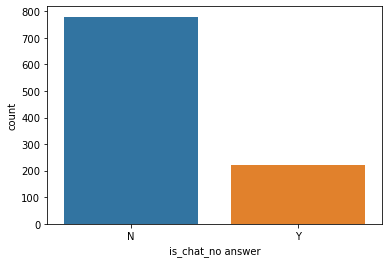

In [80]:
#C#5

ax = sns.countplot(data = FA1, x = 'is_chat_no answer')

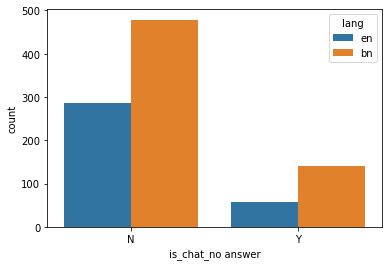

In [81]:
#C#6

FA1_lang = FA1['lang'].unique().tolist()[0:2]

FA1_anomaly_lang_filtered = FA1[FA1['lang'].isin(FA1_lang)]

ax = sns.countplot(data = FA1_anomaly_lang_filtered, x = 'is_chat_no answer', hue = 'lang')

In [82]:
#C#7

FA1ENCountY = FA1_is_chat_no_answerY['lang'].value_counts()['en']
FA1LCCountY = FA1_is_chat_no_answerY['lang'].value_counts()['bn']
FA1ENCountN = FA1_is_chat_no_answerN['lang'].value_counts()['en']
FA1LCCountN = FA1_is_chat_no_answerN['lang'].value_counts()['bn']
FA1CountAnomalyLang = FA1['lang'].count() - (FA1ENCountY + FA1LCCountY + FA1ENCountN + FA1LCCountN)


print("Queries not answered and query language English", percentage(FA1ENCountY,  FA1.shape[0]), "Count:", FA1ENCountY)
print("Queries not answered and query language Bangla", percentage(FA1LCCountY, FA1.shape[0]), "Count:", FA1LCCountY)
print("Queries answered and query language English", percentage(FA1ENCountN, FA1.shape[0]), "Count:",FA1ENCountN)
print("Queries answered and query language Bangla", percentage(FA1LCCountN, FA1.shape[0]), "Count:",FA1LCCountN)
print("Anomaly detected during language detection:", percentage(FA1CountAnomalyLang, FA1.shape[0]), "Count:",FA1CountAnomalyLang)



Queries not answered and query language English 5.7% Count: 57
Queries not answered and query language Bangla 14.0% Count: 140
Queries answered and query language English 28.5% Count: 285
Queries answered and query language Bangla 47.8% Count: 478
Anomaly detected during language detection: 4.0% Count: 40


In [83]:
#C#8

FA1_is_chat_no_answerY = FA1_is_chat_no_answerY.reset_index()  #reset index to ensure array number consistency
FA1_is_chat_no_answerY = FA1_is_chat_no_answerY.drop(FA1_is_chat_no_answerY.columns[[0, 1]], axis = 1) #Drop redundant columns (DatC)
#FA1_is_chat_no_answerY = phase1_is_chat_no_answer

In [84]:
#C#9

FA1_is_chat_no_answerN = FA1_is_chat_no_answerN.reset_index()  ##reset index to ensure array number consistency
FA1_is_chat_no_answerN = FA1_is_chat_no_answerN.drop(FA1_is_chat_no_answerN.columns[[0, 1]], axis = 1)  #Drop redundant columns (DatC)

In [85]:
#C#10

#This cell requires further editing to print the top KTs or SOPs instead of the top 10 quries
print("Queries that were not answered")
display(FA1_is_chat_no_answerY["query"][0:10])
print("Queries that were answered ")
display(FA1_is_chat_no_answerN["query"][0:10])

Queries that were not answered


0                                          এখন কি করবো
1                 Sir amar order conform hocce na kano
2                                         kono.kajer a
3                                  amr ekta order selo
4    Amar basa parbotipur kintu parbotipur jaygata ...
5                     Mystery box surprise offer takbe
6                               27 tarik ar modde asbe
7                                       Ekta qsnchilow
8                                      এখন আমি কি করবো
9                  ami pono ordar koresi ata cobe pabo
Name: query, dtype: object

Queries that were answered 


0                how to buy mystery box..?
1                       আমার অর্ডার কোথায়?
2                       আমার অর্ডার কোথায়?
3                                        0
4                       আমার অর্ডার কোথায়?
5                                        ও
6       কালেকশন পয়েন্ট কোন সময়ে খোলা থাকবে
7    আমি কি আমার অর্ডারটি বাতিল করতে পারি?
8                      Taka detail parbona
9                                      Hlw
Name: query, dtype: object

#### Granular Details of the language

/mnt/d/Anaconda/Anaconda2021/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/d/Anaconda/Anaconda2021/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_7567/1487030758.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


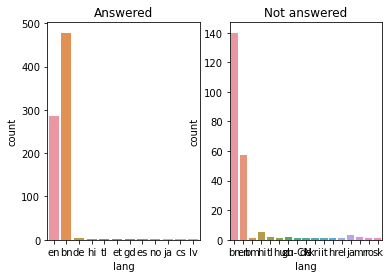

In [86]:
#C#11

fig, ax = plt.subplots(1,2)
sns.countplot(FA1_is_chat_no_answerN['lang'], ax=ax[0]).set(title="Answered")
sns.countplot(FA1_is_chat_no_answerY['lang'], ax=ax[1]).set(title="Not answered")
fig.show()


In [87]:
#C#12

print("Breakdown of language of queries that were answered by the chatbot")
display(FA1_is_chat_no_answerN['lang'].value_counts())
print("Breakdown of language of queries that were not answered by the chatbot")
display(FA1_is_chat_no_answerY['lang'].value_counts())

Breakdown of language of queries that were answered by the chatbot


bn    478
en    285
de      5
hi      3
tl      1
et      1
gd      1
es      1
no      1
ja      1
cs      1
lv      1
Name: lang, dtype: int64

Breakdown of language of queries that were not answered by the chatbot


bn       140
en        57
hi         5
ja         3
tl         2
mr         2
gu         2
hr         1
ro         1
el         1
de         1
it         1
kri        1
zh-CN      1
hu         1
bm         1
sk         1
Name: lang, dtype: int64

In [90]:
#C#13

#Anomaly datframe creation for future reference

FA1_lang = FA1['lang'].unique().tolist()[2:-1]

FA1_anomaly_langDF = FA1.loc[FA1['lang'].isin(FA1_lang)]   #Find all the rows 

FA1_anomaly_langDF = FA1_anomaly_langDF.reset_index()  #Reset index

FA1_anomaly_langDF = FA1_anomaly_langDF.drop(FA1_anomaly_langDF.columns[[0, 1]], axis = 1)  #Drop the redundant Index column

# FA1_anomaly_langDF  #Prepared dataframe for data manipulation

In [89]:
#C#14

#Samples to check in the language anomaly detection 

FA1_anomaly_langDF[FA1_anomaly_langDF['lang'] == "gu"]["query"]    #To check the queries that are being considered as anomaly

13    Proceed to pay te jeye r odr dwa jashe nah
30                         Order bocce name keno
Name: query, dtype: object

### Focus Area One (FA2)

#### The rows that needs to be selected

Focus area objectives:

1) Find if the queries mathces with the Standard Knowledge Title

The following columns are required:

is_session_unsatisfied <br>
call_agent_by_click_shortcut <br>
call_agent_by_intention <br>
is_chat_no answer <br>
switch <br>
Correct Answer Yes/No <br>

##### Similarities between the queries and the Standar Knowledge Title

In [100]:
#Testing

#if is_session_unsatisfied == "N": there is an answer
# if is_session_unsatisfied == "Y": there is no answer
#FA1_is_chat_no_answerY     #check answers
#FA1['Question Type'].unique()
display(FA1_is_chat_no_answerY['Question Type'].value_counts())

display(FA1_is_chat_no_answerN['Question Type'].value_counts())

No Answer Routing    221
Name: Question Type, dtype: int64

SOP                       303
KBS                       208
Instruct to Live Agent     89
Recommendation             85
Chitchat                   41
Garbage                    37
订单号反问(正向)                   8
Image                       5
Pre-Match                   3
Name: Question Type, dtype: int64

In [2]:
#Testing

embeddings = laser.embed_sentences(
    ['What is the price of this product?',
     'আমার অর্ডার কোথায়?'],
    lang=['en', 'be'])

In [11]:
len(embeddings[0])

1024

In [14]:
embeddings[0].reshape(1,-1)

array([[ 3.7370098e-03, -4.7304547e-05, -1.5329365e-03, ...,
        -1.6499510e-03, -5.3946152e-03,  2.8023852e-02]], dtype=float32)

In [13]:
#Testing

print(1 - distance.cosine(embeddings[0], embeddings[1]))
print(cosine_similarity(embeddings[0].reshape(1,-1), embeddings[1].reshape(1,-1)))

0.46110889315605164
[[0.4611089]]


In [5]:
# #Testing

# for i in range(len(FA1_is_chat_no_answerY)):
#   text = FA1_is_chat_no_answerY["query"][i] 
#   ln_source = translator.translate(text)
#   FA1["lang"][i] = ln_source.src

NameError: name 'FA1_is_chat_no_answerY' is not defined